Notebook is out of date. Previously, we compared all attack strategies here. Now we have too many and their names differ across protocols.

In [1]:
# %load withholding.py
%matplotlib notebook
import matplotlib as plt
import numpy as np
import pandas as pd

df = pd.read_csv("../../data/withholding.tsv", sep="\t")
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]


def parse_array(s):
    try:
        return np.fromstring(s, dtype=float, sep="|")
    except:
        return np.array([float("nan")])


def expand(row):
    compute = parse_array(row.compute)
    rcompute = compute / np.sum(compute)
    activations = parse_array(row.activations)
    assert np.sum(activations) == row.number_activations or row.error
    ractivations = activations / row.number_activations
    reward = parse_array(row.reward)
    rreward = reward / np.sum(reward)
    d = {}
    d["attacker_compute"] = rcompute[0]
    d["attacker_relative_activations"] = ractivations[0]
    d["attacker_relative_reward"] = rreward[0]
    d["attacker_gain"] = rreward[0] - ractivations[0]
    d["attacker_efficiency"] = rreward[0] / ractivations[0]
    return d


df = df.join(df.apply(expand, axis=1, result_type="expand"))

In [2]:
df.columns

Index(['network', 'network_description', 'compute', 'protocol', 'k',
       'protocol_description', 'block_interval', 'activation_delay',
       'number_activations', 'activations', 'incentive_scheme',
       'incentive_scheme_description', 'strategy', 'strategy_description',
       'reward', 'ca_time', 'ca_height', 'machine_duration_s', 'error',
       'version', 'attacker_compute', 'attacker_relative_activations',
       'attacker_relative_reward', 'attacker_gain', 'attacker_efficiency'],
      dtype='object')

In [3]:
df[df.protocol != "nakamoto"].pivot(
    index=["attacker_compute", "k"],
    columns=["protocol", "strategy", "incentive_scheme"],
    values="attacker_efficiency",
)

protocol                     bk                                       bkll  \
strategy            ssz-selfish           ssz-honest           ssz-selfish   
incentive_scheme       constant     block   constant     block    constant   
attacker_compute k                                                           
0.10             1     0.713391  0.713391   1.000000  1.000000    0.215263   
                 2     0.185633  0.185633   1.000000  1.002956    0.040895   
                 4     0.005511  0.004409   1.000000  0.984252    0.005541   
                 8     0.000000  0.000000   1.000000  0.956784    0.000000   
                 16    0.000000  0.000000   1.000000  0.809717    0.000000   
                 32    0.000000  0.000000   1.001603  0.975191    0.000000   
                 64    0.000000  0.000000   0.999498  1.010019    0.000000   
0.20             1     0.892116  0.892116   1.000000  1.000000    0.471975   
                 2     0.471277  0.453299   1.000000  1.011066    0.237549   
                 4     0.137505  0.121105   1.000000  1.051452    0.056990   
                 8     0.005015  0.005015   1.000000  1.007021    0.000000   
                 16    0.000000  0.000000   1.000000  1.086324    0.000000   
                 32    0.000000  0.000000   1.000094  0.884950    0.000000   
                 64    0.000000  0.000000   0.999121  0.952962    0.000000   
0.25             1     0.972833  0.972833   1.000000  1.000000    0.588669   
                 2     0.596509  0.584205   1.000000  0.967336    0.360660   
                 4     0.262929  0.236530   1.000000  0.970890    0.119241   
                 8     0.033191  0.029979   1.000000  0.973059    0.014748   
                 16    0.000000  0.000000   1.000000  1.052960    0.000000   
                 32    0.000000  0.000000   1.000420  0.959015    0.000000   
                 64    0.000000  0.000000   0.999986  1.034747    0.000000   
0.33             1     1.092377  1.092377   1.000000  1.000000    0.806867   
                 2     0.944517  0.929646   1.000000  0.977628    0.633892   
                 4     0.570959  0.530713   1.000000  1.023116    0.445842   
                 8     0.272950  0.252648   1.000000  0.947146    0.205314   
                 16    0.053806  0.051070   1.000000  1.037083    0.041057   
                 32    0.000000  0.000000   0.999500  0.999500    0.000000   
                 64    0.000000  0.000000   0.999767  0.763592    0.000000   
0.40             1     1.206049  1.206049   1.000000  1.000000    0.967455   
                 2     1.213168  1.194078   1.000000  0.996491    0.904939   
                 4     0.882256  0.836878   1.000000  1.004744    0.757972   
                 8     0.622362  0.590938   1.000000  0.971029    0.557099   
                 16    0.466223  0.447705   1.000000  0.982840    0.348310   
                 32    0.135949  0.133857   1.000852  0.928791    0.124425   
                 64    0.027350  0.026929   0.999606  0.974155    0.000000   
0.45             1     1.271152  1.271152   1.000000  1.000000    1.101197   
                 2     1.333206  1.296772   1.000000  1.015350    1.065983   
                 4     1.217408  1.171852   1.000000  0.994189    1.057326   
                 8     0.987807  0.951424   1.000000  1.000223    0.898530   
                 16    0.880594  0.860814   1.000000  0.909699    0.862246   
                 32    0.681395  0.667358   0.999796  1.047664    0.605084   
                 64    0.367405  0.364154   0.999820  1.112595    0.343785   
0.50             1     1.338717  1.338717   1.000000  1.000000    1.238351   
                 2     1.560950  1.549796   1.000000  0.986416    1.201716   
                 4     1.487314  1.457645   1.000000  1.018762    1.353922   
                 8     1.671723  1.657522   1.000000  1.026866    1.452614   
                 16    1.614950  1.606550   1.000000  1.045710    1.387891   
                 32   

<IPython.core.display.Javascript object>


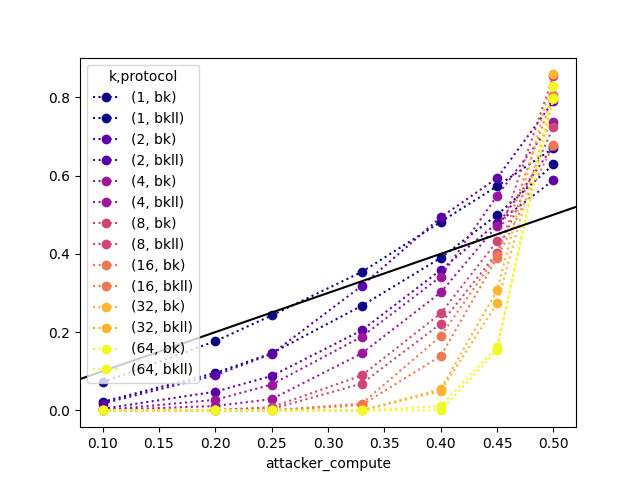

In [4]:
# compare same strategy for different protocols
d = df
d = d[d["strategy"] == "ssz-selfish"]
d = d[d.incentive_scheme == "constant"]
d = d.pivot(
    index=["attacker_compute"],
    columns=["k", "protocol"],
    values="attacker_relative_reward",
)
d = d[sorted(d.columns)]
line_style = ["o-" if proto == "tailstorm" else "o:" for (k, proto) in d.columns]
k = np.unique([k for (k, proto) in d.columns])
cmap = plt.cm.get_cmap("plasma", len(k))
colormap = {k: cmap(i) for (i, k) in enumerate(k)}
line_colors = [colormap[k] for (k, proto) in d.columns]
line_colors
p = d.plot(style=line_style, color=line_colors)
p.axline([0.1, 0.1], [0.5, 0.5], color="black")